# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import timedelta

## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [6]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [7]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)
df_close = yf.download(ticker_list, start=start_date, end=end_date, progress=True)['Close']
display(df_close)

/tmp/ipython-input-7-1933727486.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(ticker_list, start=start_date, end=end_date, progress=True)['Close']
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376282,168.283661,154.714767,156.160004,103.735458,91.096085,293.442108,469.390015,189.859940,55.668907,...,29.172792,91.453209,51.484390,111.217087,129.094421,66.839996,132.078369,118.202545,309.049988,156.223282
2024-05-02,136.217346,171.991287,153.844177,158.330002,103.374336,90.497009,295.092773,476.570007,192.405899,56.603554,...,29.955240,93.958237,51.493969,111.418373,134.052750,70.300003,131.824631,117.115036,312.709991,164.827881
2024-05-03,138.129074,182.279160,156.695099,159.710007,103.354828,89.774330,298.403870,486.179993,195.480637,56.431885,...,30.032518,95.378410,51.934326,111.188332,135.255356,69.470001,131.112152,120.278717,309.589996,164.670197
2024-05-06,139.278091,180.619171,155.681030,162.000000,103.101074,92.370285,300.712860,493.589996,199.093948,57.404690,...,30.022860,96.522446,52.039631,111.907219,137.217010,73.529999,132.907913,119.191193,315.790009,163.566269
2024-05-07,139.931854,181.305023,155.508820,159.809998,103.618340,93.387741,305.232452,492.269989,199.338730,58.739899,...,29.800680,95.891243,52.671459,111.351280,138.035187,71.599998,132.644409,120.051323,317.869995,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In this case I'll use a SMA because its slower response to price changes can help avoid false signals from short-term price spikes.

In [8]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)
df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()
print("Moving Average 50 days")
display(df_ma50.tail())
print("Moving Average 200 days")
display(df_ma200.tail())

Moving Average 50 days


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,118.589774,219.229514,194.882048,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290147,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931156
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194041,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535974
2025-04-28,117.376369,218.051459,194.792594,127.782001,129.642279,91.7896,318.998219,397.680000,203.901112,46.480952,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320587
2025-04-29,116.839011,217.384534,194.840304,127.063401,129.652079,91.8734,317.245909,395.896400,203.482810,46.524306,...,28.049856,82.593967,68.855058,109.043688,119.324127,59.358801,151.419251,105.448960,272.873398,158.289487
2025-04-30,116.293892,216.745971,194.853134,126.289801,129.675380,91.9204,315.515956,394.113801,202.998097,46.560732,...,27.978171,82.381536,68.909186,108.954311,119.126358,58.844601,151.498900,105.470672,271.258199,158.298382


Moving Average 200 days


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,133.080366,227.101211,183.261853,130.701575,116.973859,96.197872,340.475851,478.509449,214.891999,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549300,72.28710,136.723923,106.728764,346.199799,172.881444
2025-04-25,132.988337,227.008163,183.380334,130.551875,117.119244,96.185332,340.478538,477.517949,214.720083,52.293548,...,29.719768,85.156247,64.130068,111.439660,125.467794,72.25500,136.835707,106.711043,345.854800,172.787551
2025-04-28,132.891064,226.898010,183.529515,130.409175,117.261134,96.177719,340.493396,476.538299,214.512770,52.222563,...,29.712475,85.151355,64.220807,111.437108,125.371802,72.22490,136.937422,106.688921,345.453200,172.697852
2025-04-29,132.778128,226.820123,183.676030,130.306625,117.402337,96.178483,340.515407,475.605049,214.322794,52.150145,...,29.699563,85.139760,64.309746,111.426793,125.281706,72.19025,137.037121,106.665545,345.091850,172.596478
2025-04-30,132.658895,226.733898,183.828657,130.182325,117.544590,96.173074,340.478450,474.684699,214.120323,52.077435,...,29.685689,85.115950,64.397867,111.402856,125.198611,72.13890,137.141726,106.640988,344.717500,172.493530


### Detecting Golden and Death Crosses in the last 14 days

In [9]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks

def cross(ma50, ma200, days):
    results = []

    for ticker in ma50.columns:
        ma50_series = ma50[ticker]
        ma200_series = ma200[ticker]

        diff = ma50_series - ma200_series

        diff = diff.dropna()

        recent_diff = diff.tail(days + 1)

        for i in range(1, len(recent_diff)):
            prev = recent_diff.iloc[i - 1]
            curr = recent_diff.iloc[i]
            date = recent_diff.index[i]

            if prev < 0 and curr >= 0:
                results.append({'Ticker': ticker, 'Date': date, 'Type': 'Golden Cross'})
            elif prev > 0 and curr <= 0:
                results.append({'Ticker': ticker, 'Date': date, 'Type': 'Death Cross'})

    return pd.DataFrame(results)

In [10]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)
cross_df = cross(df_ma50, df_ma200, 14)
display(cross_df)

,Ticker,Date,Type
0,ACN,2025-04-10,Death Cross
1,ADSK,2025-04-11,Death Cross
2,AME,2025-04-22,Death Cross
3,AMP,2025-04-24,Death Cross
4,AMT,2025-04-21,Golden Cross
...,...,...,...
67,UNP,2025-04-16,Death Cross
68,VST,2025-04-30,Death Cross
69,WAB,2025-04-21,Death Cross
70,WAT,2025-04-28,Death Cross


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [11]:
def sort_cross(cross_df, cross_type):
  df = cross_df[cross_df['Type'] == cross_type]
  sorted = df.sort_values(by='Ticker')
  return sorted

golden_sorted = sort_cross(cross_df, 'Golden Cross')
display(golden_sorted.head(10))
len(golden_sorted)

,Ticker,Date,Type
4,AMT,2025-04-21,Golden Cross
14,CI,2025-04-30,Golden Cross
26,EW,2025-04-17,Golden Cross
34,INVH,2025-04-30,Golden Cross
37,KDP,2025-04-21,Golden Cross
44,MDLZ,2025-04-28,Golden Cross
46,MOH,2025-04-28,Golden Cross
49,NEM,2025-04-14,Golden Cross
56,SBAC,2025-04-29,Golden Cross
57,SJM,2025-04-25,Golden Cross


10

YOUR WRITTEN RESPONSE HERE

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [12]:
death_sorted = sort_cross(cross_df, 'Death Cross')
display(death_sorted.head(10))
len(death_sorted)

,Ticker,Date,Type
0,ACN,2025-04-10,Death Cross
1,ADSK,2025-04-11,Death Cross
2,AME,2025-04-22,Death Cross
3,AMP,2025-04-24,Death Cross
5,AMZN,2025-04-22,Death Cross
6,APD,2025-04-21,Death Cross
7,APO,2025-04-17,Death Cross
8,AXP,2025-04-22,Death Cross
9,BAC,2025-04-16,Death Cross
10,BLK,2025-04-16,Death Cross


62

YOUR WRITTEN RESPONSE HERE

### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

In [13]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500
df_returns = df_close.pct_change()

df_volatility = df_returns.std()
display(df_volatility.head(10))

/tmp/ipython-input-13-2831514968.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df_close.pct_change()


,0
Ticker,
A,0.018595
AAPL,0.020583
ABBV,0.017048
ABNB,0.026069
ABT,0.012995
ACGL,0.016270
ACN,0.016878
ADBE,0.023378
ADI,0.026676


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

In [14]:
# CODE HERE
# Visualize the results here
n = 10
golden_tickers = golden_sorted['Ticker'].unique()[:n]
death_tickers = death_sorted['Ticker'].unique()[:n]

def plot_crosses(tickers, cross_data, volatility, cross):
    for ticker in tickers:
        vol = volatility.get(ticker, np.nan)
        plt.figure(figsize=(12, 6))

        plt.plot(df_close[ticker], label='Close Price', color='black', linewidth=1)
        plt.plot(df_ma50[ticker], label='50-day MA', color='blue', linewidth=1.5)
        plt.plot(df_ma200[ticker], label='200-day MA', color='red', linewidth=1.5)

        cross_subset = cross_data[cross_data['Ticker'] == ticker]
        for _, row in cross_subset.iterrows():
            date = row['Date']
            price = df_close[ticker].loc[date]

            color = 'green' if row['Type'] == 'Golden Cross' else 'red'
            label = 'Golden' if row['Type'] == 'Golden Cross' else 'Death'

            plt.axvline(x=date, color=color, linestyle='--', alpha=0.7)
            plt.text(date, price, label, rotation=90, verticalalignment='bottom', color=color)

        last_date = df_close.index[-1]
        start_shade = last_date - timedelta(days=14)
        plt.axvspan(start_shade, last_date, color='black', alpha=0.1)

        plt.title(f"{ticker} - {cross} Crosses | Volatility: {vol:.6f}")
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


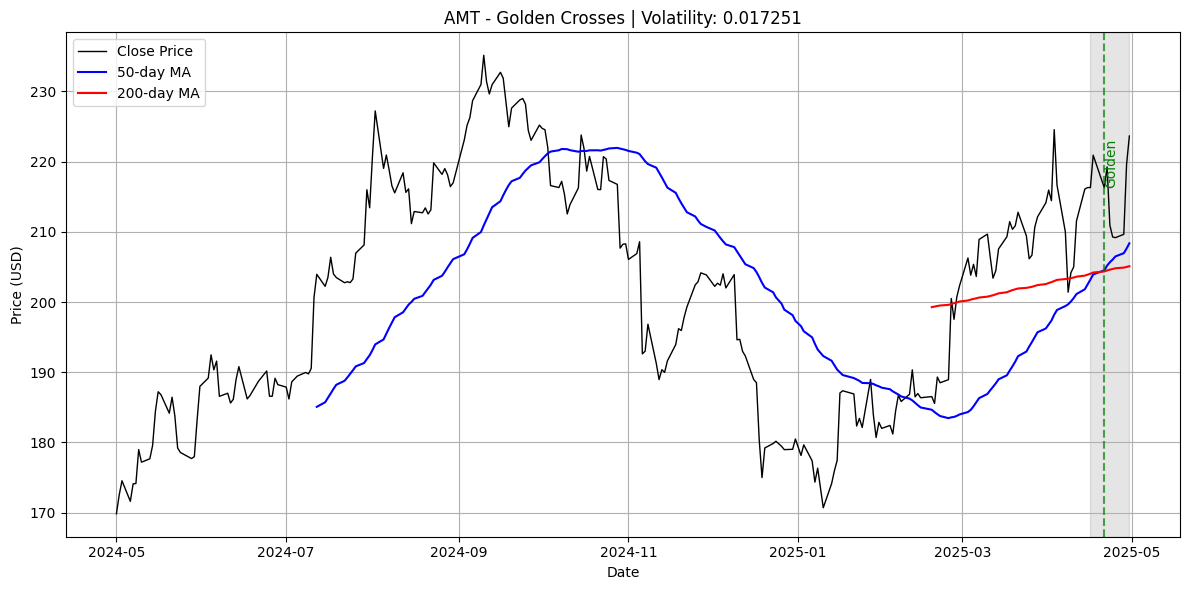

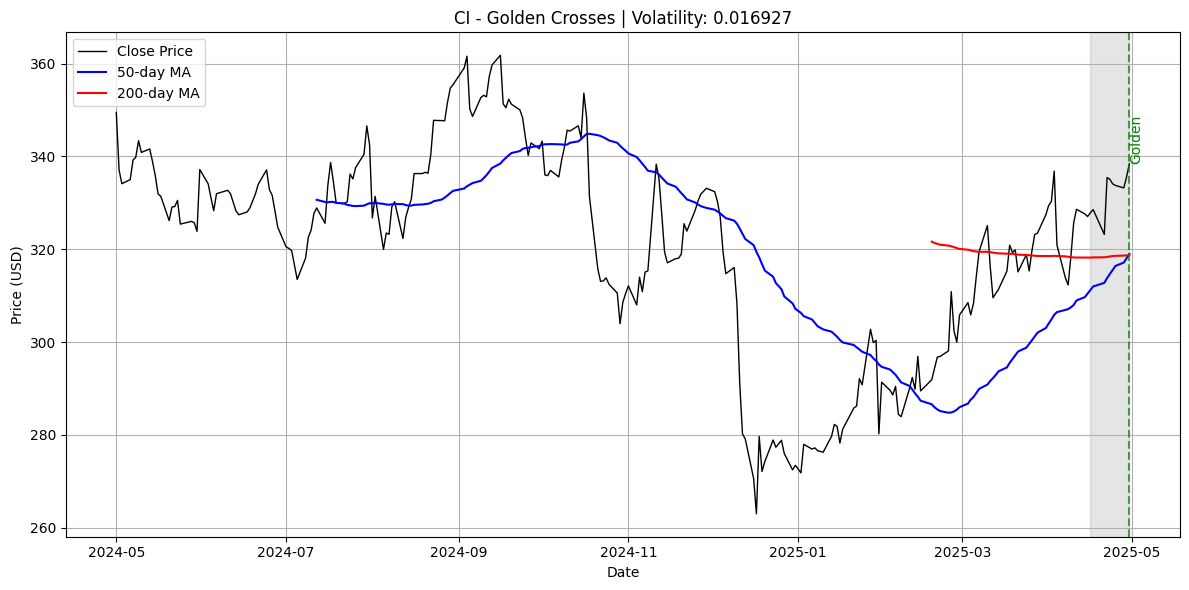

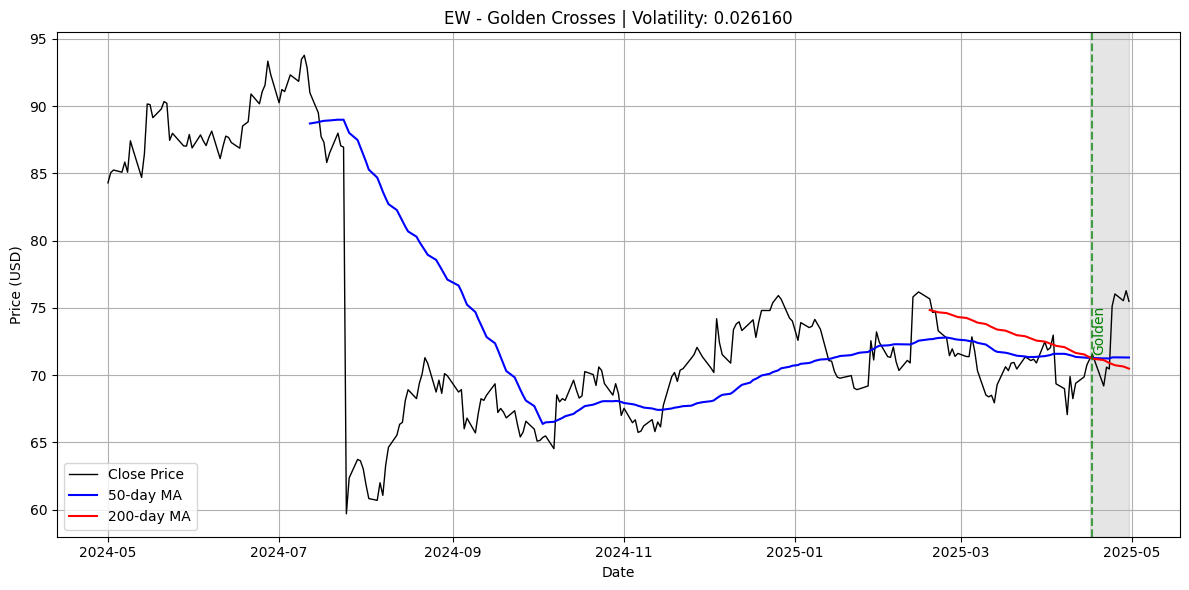

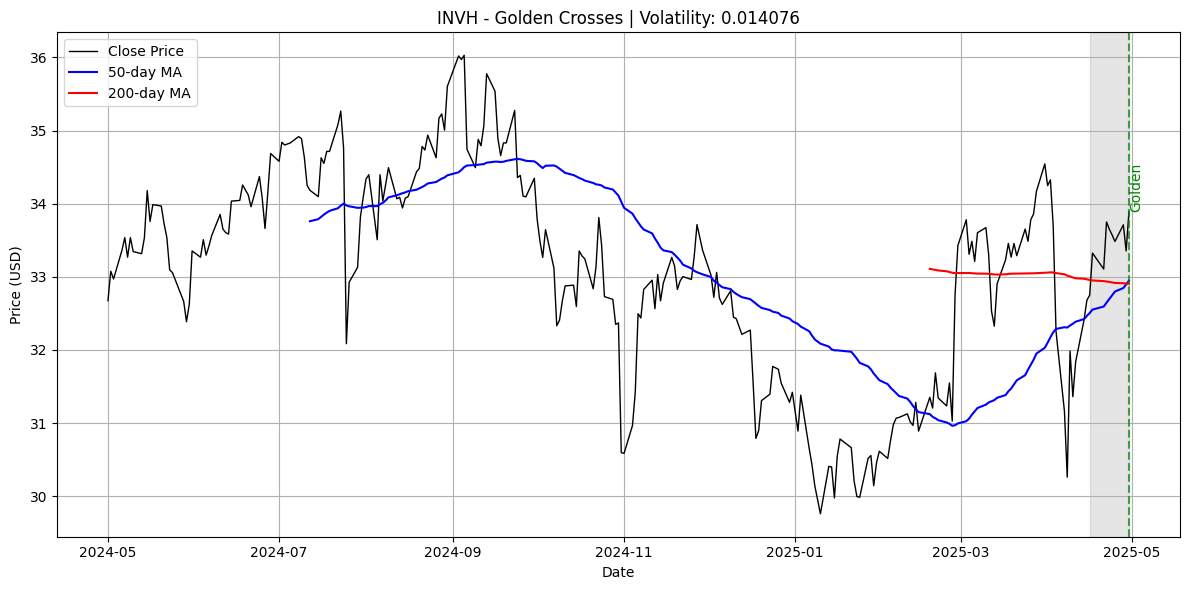

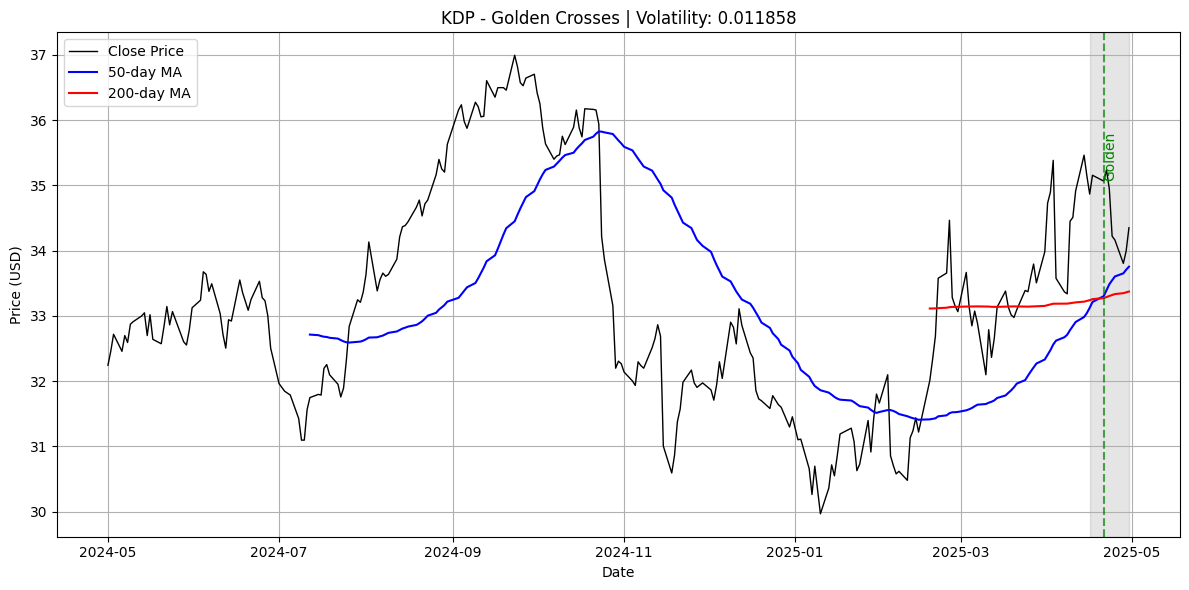

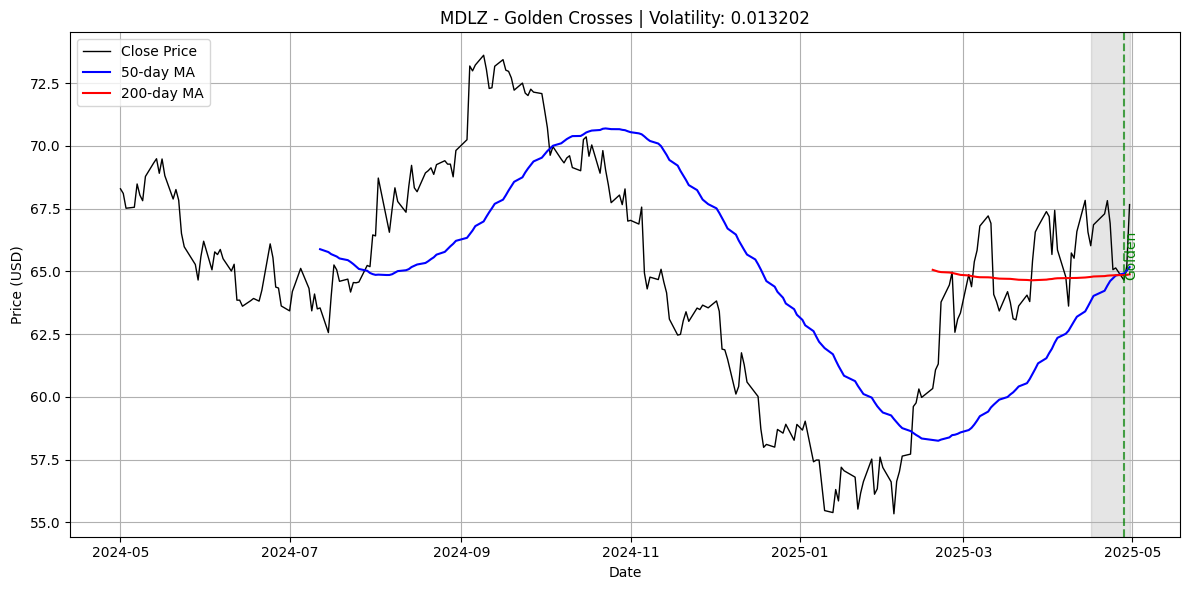

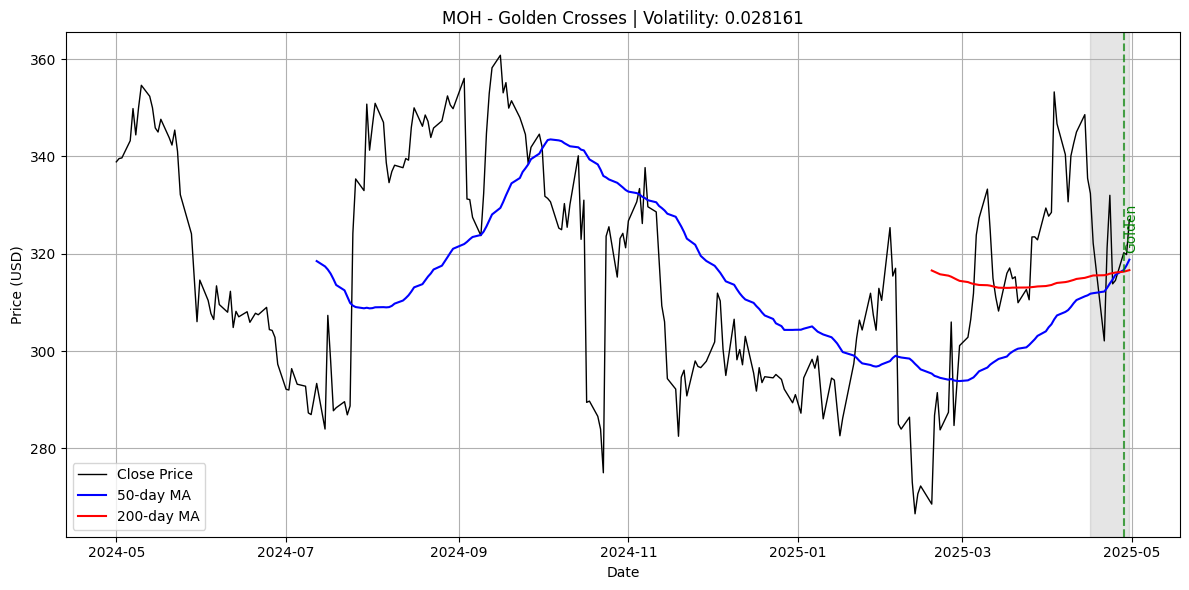

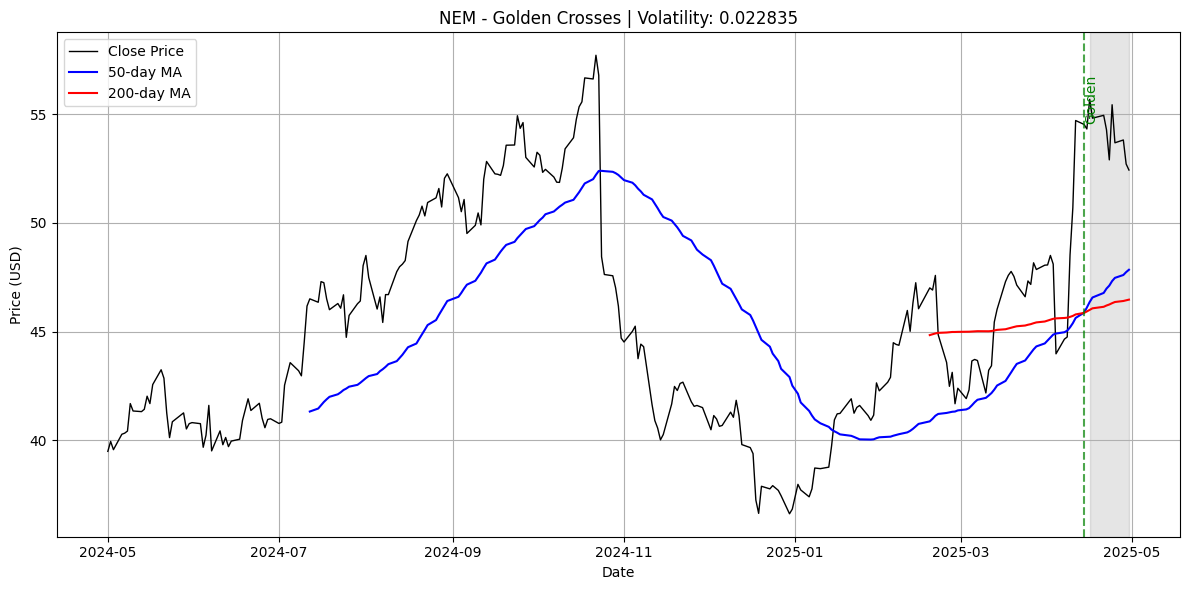

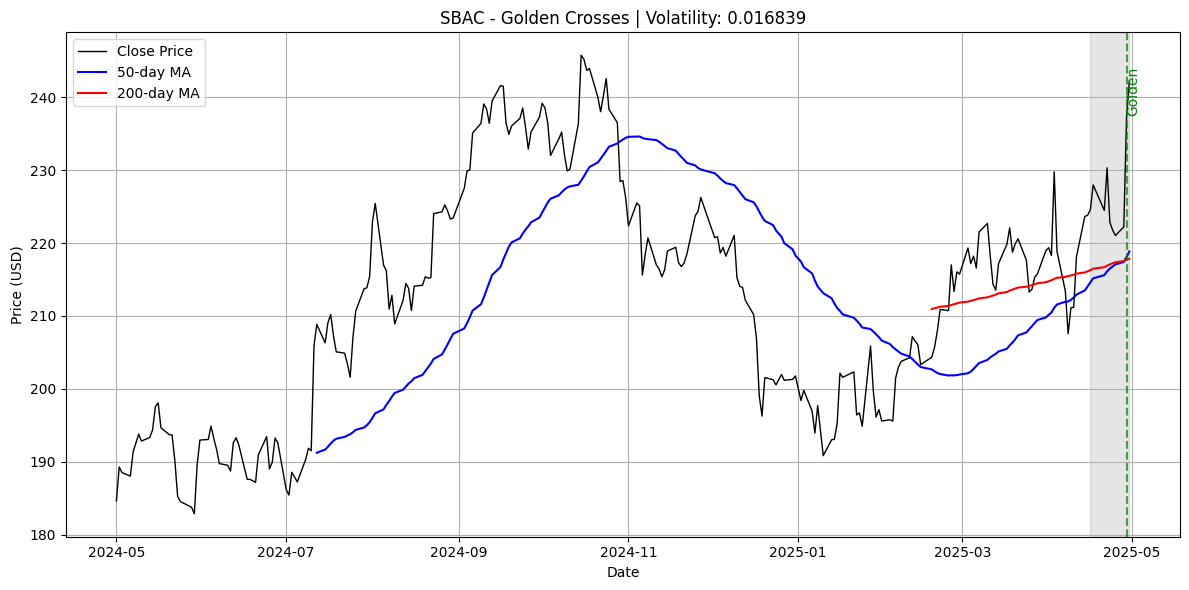

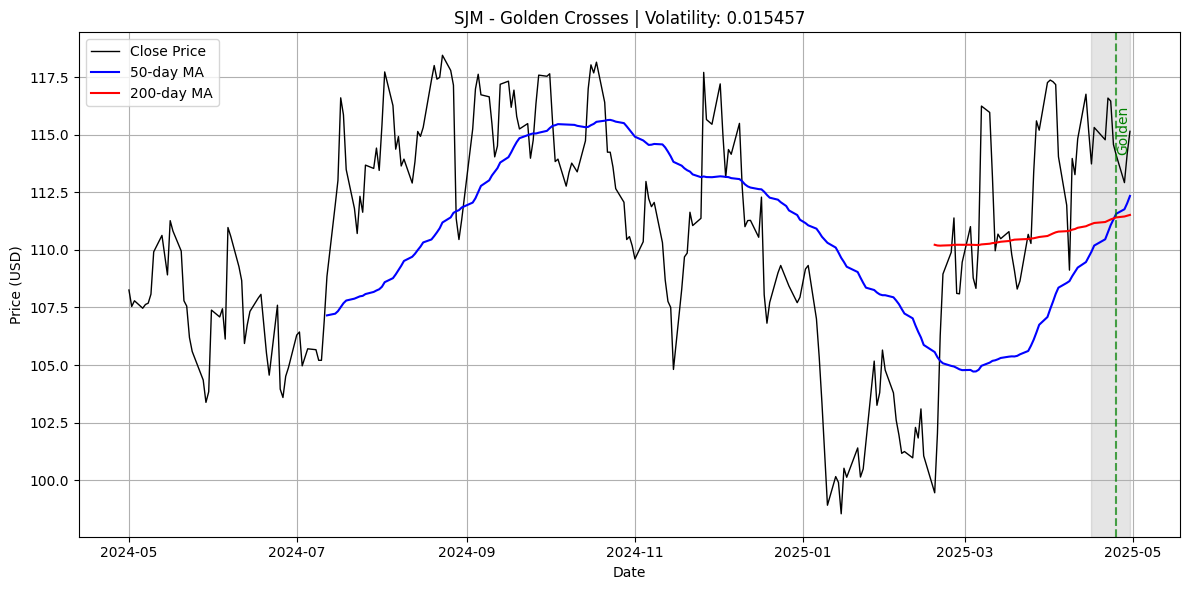

In [15]:
plot_crosses(golden_tickers, golden_sorted, df_volatility, "Golden")

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

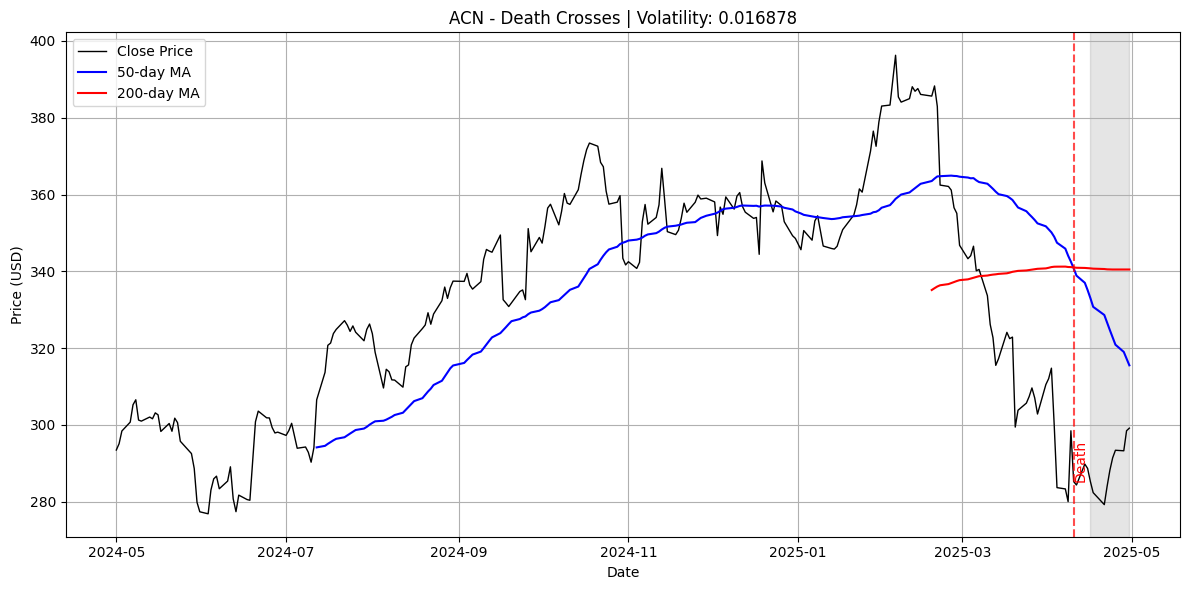

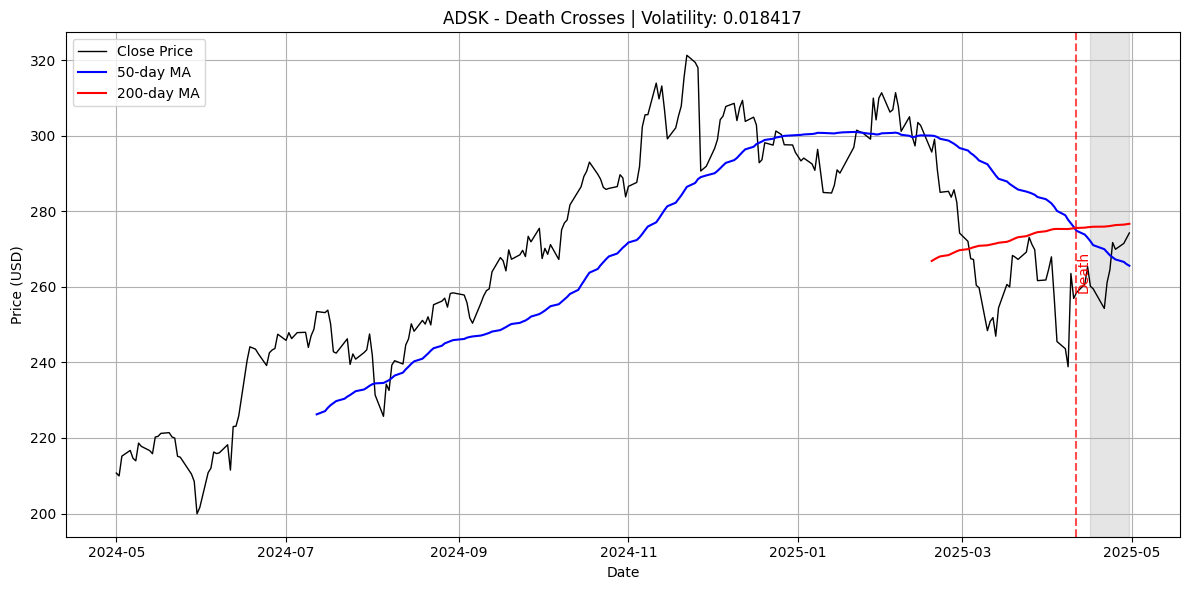

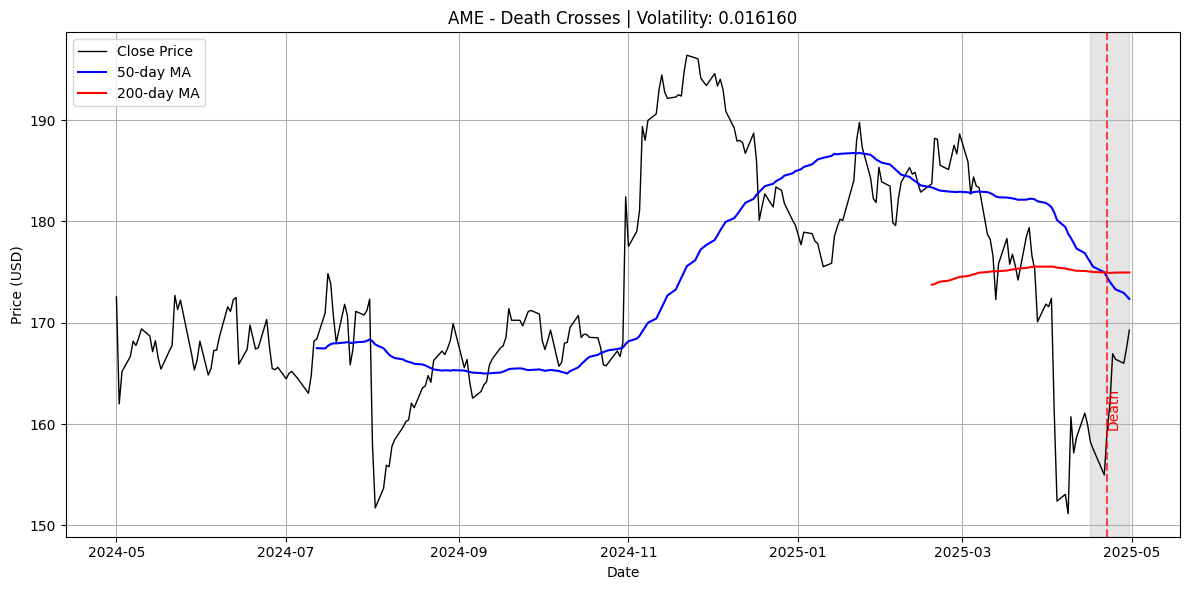

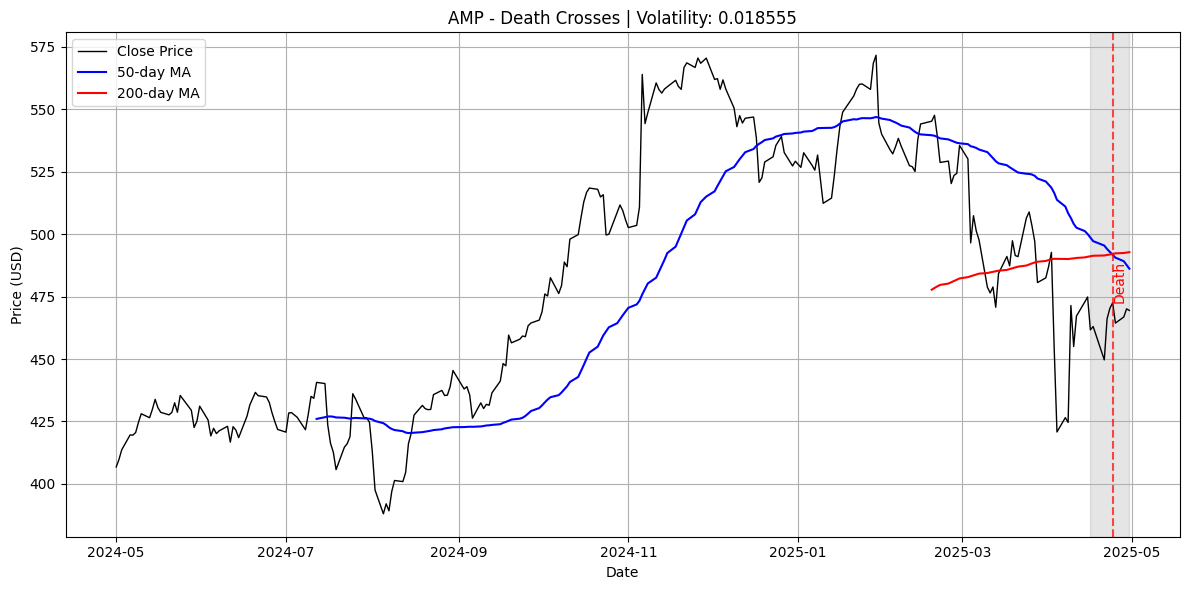

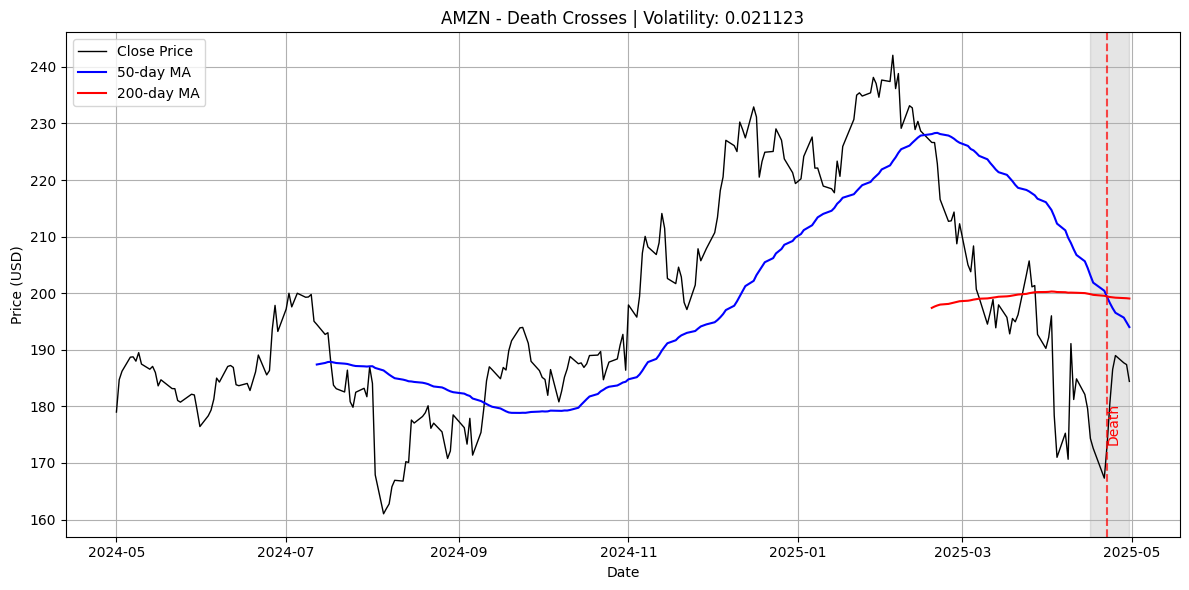

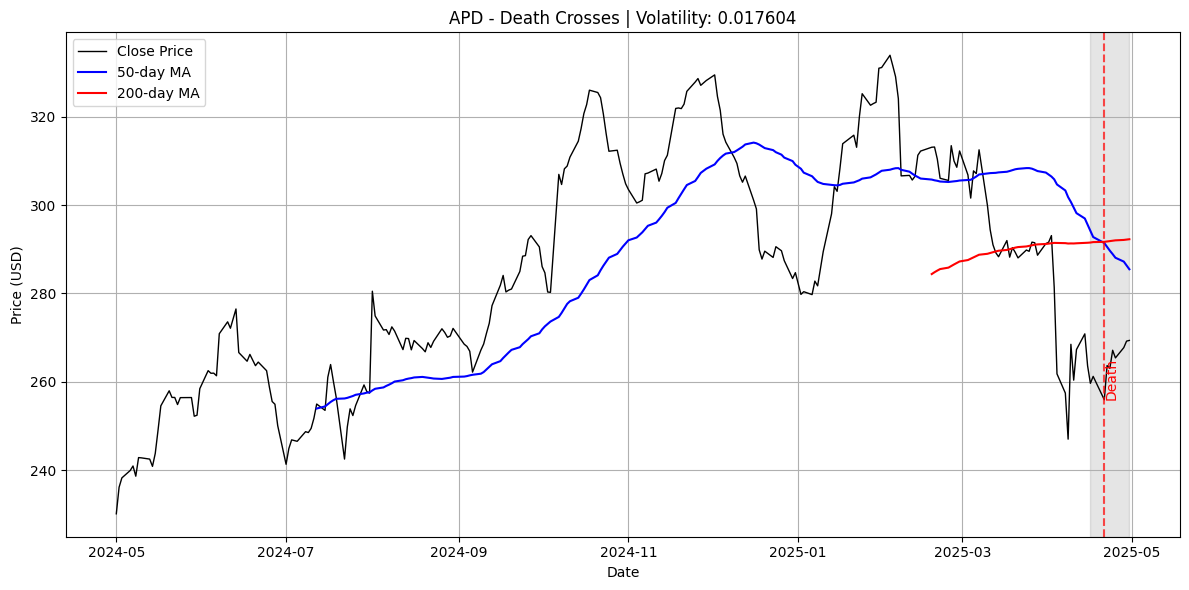

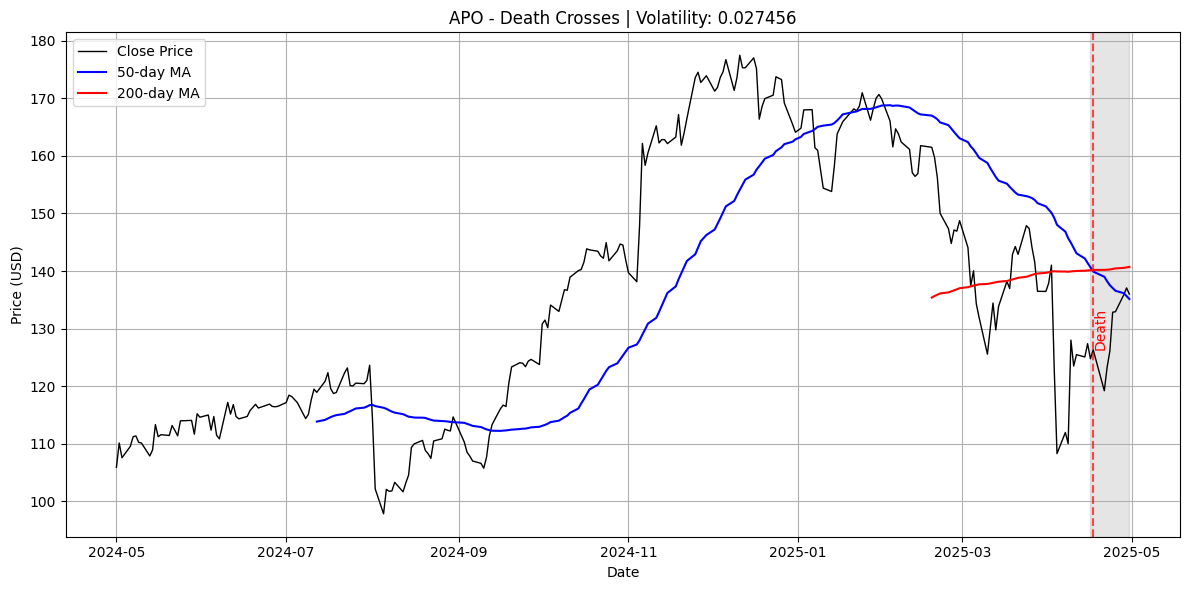

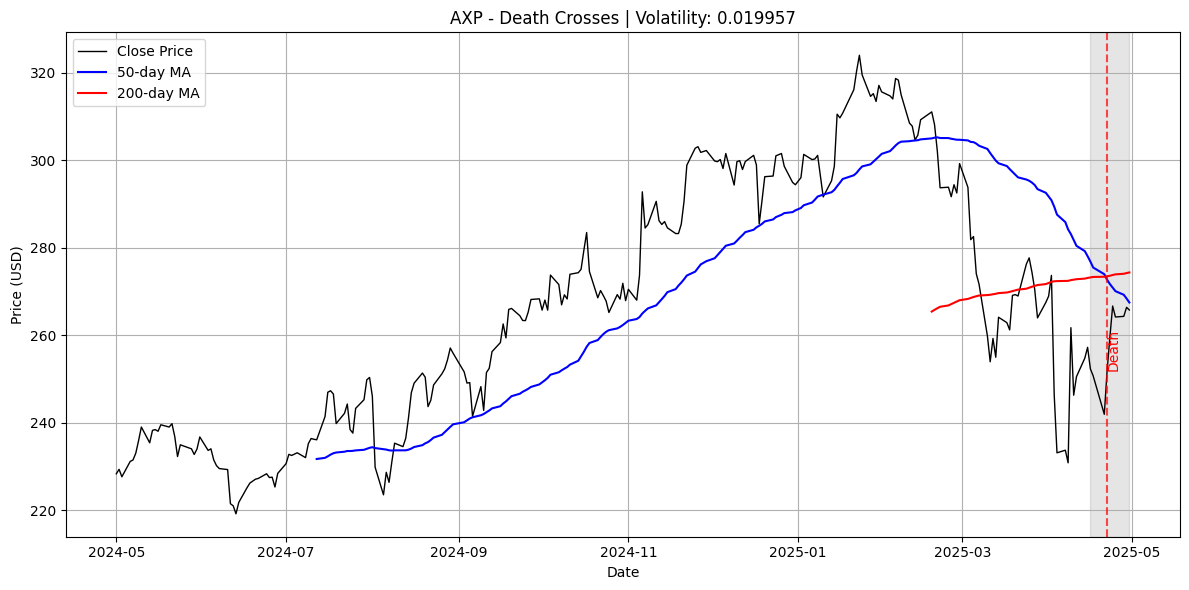

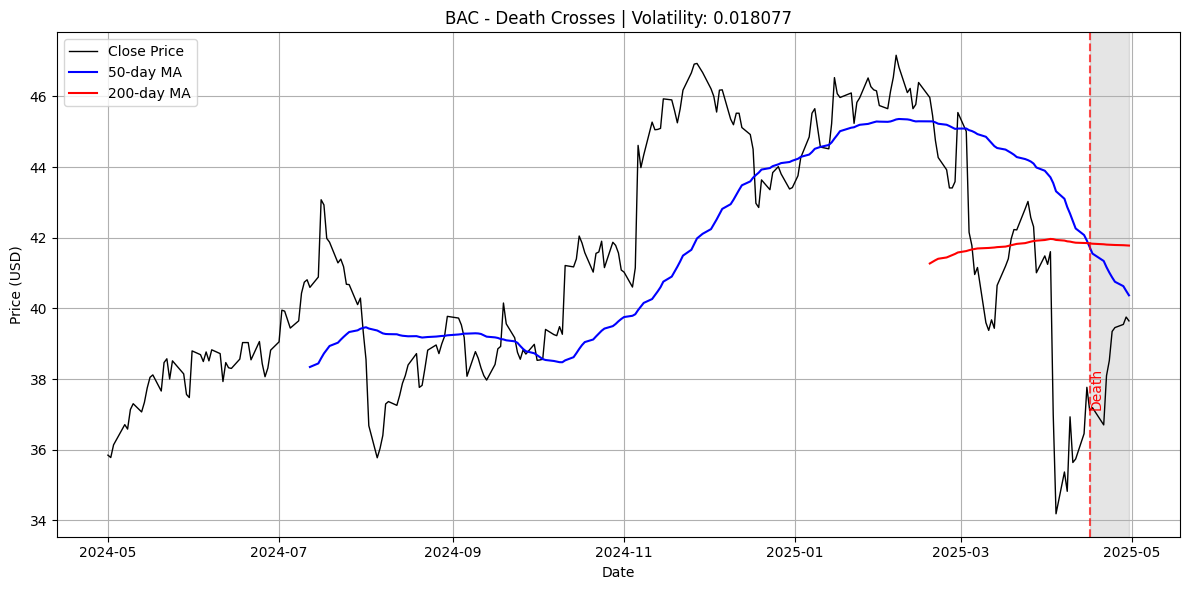

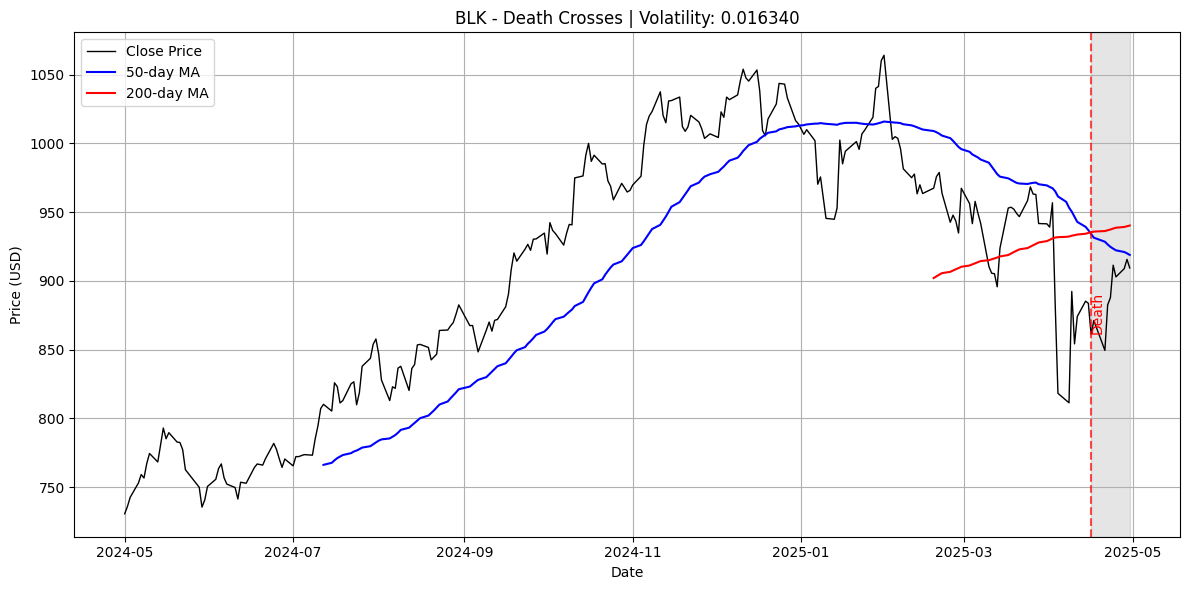

In [16]:
# CODE HERE
# Visualize the results here
plot_crosses(death_tickers, death_sorted, df_volatility, "Death")

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

YOUR WRITTEN RESPONSE HERE

A Golden Cross happens when a short-term moving average, like the 50-day MA, crosses above a long-term moving average, like the 200-day MA. It’s usually seen as a signal of a potential long-term bull market, suggesting that momentum may be shifting upwards and a sustained uptrend could be starting. Investors often take it as confirmation that market sentiment is improving, although it’s important to remember it’s not a guarantee


#### What is a Death Cross and how might market participants react to it?

YOUR WRITTEN RESPONSE HERE

A Death Cross is the opposite of a Golden Cross, it happens when the short-term moving average crosses below the long-term moving average. It’s generally seen as a signal of a potential long-term bear market, suggesting that momentum may be shifting downward and that a longer-term downtrend could be starting. Market participants might react by becoming more cautious. Some may sell positions to avoid potential losses, while others might look for shorting opportunities.


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

YOUR WRITTEN RESPONSE HERE

Moving averages like the MA50 and MA200 are used in technical analysis because they help smooth out short-term price fluctuations and highlight the underlying trend. The 50-day MA reflects medium-term sentiment, while the 200-day MA captures long-term trends. When analysts compare the two, it can reveal shifts in momentum, for example, crossovers like the Golden or Death Cross. They're normally used among investors because they're simple, yet often effective at signaling potential entry or exit points.



#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

YOUR WRITTEN RESPONSE HERE

The 14-day window is used to spot recent crossovers, which can be helpful for identifying current opportunities rather than outdated signals. It’s a practical way to narrow down the list to stocks that have shown a technical shift in the very near term.

That said, focusing only on 14 days could mean ignoring crosses that happened just before that window but are still impacting the trend. So while it keeps the analysis fresh, it also introduces the risk of missing context.


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

YOUR WRITTEN RESPONSE HERE

Volatility gives context to how significant or reliable a crossover might be. If a stock has high volatility, its moving averages can cross more often just due to noise, making signals less trustworthy. On the other hand, in low-volatility stocks, a crossover might suggest a more stable shift in trend. So by looking at the standard deviation of percentage changes, we can get a sense of how much confidence to place in the signal.

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

YOUR WRITTEN RESPONSE HERE

To measure if Golden Crosses lead to profitable trades, I’d analyze historical data and simulate trades where I buy a stock right after a Golden Cross happens. Then I’d track how much the stock price moves over a certain period of time or until another signal (like a Death Cross) appears. By comparing the profits from these trades to just holding the stock without using the Golden Cross, I can see if the signal actually helps make better decisions.

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

YOUR WRITTEN RESPONSE HERE

Using only technical indicators like moving averages without considering fundamentals can be risky because technical indicators focus just on price patterns and trends, ignoring the company’s actual financial health, industry changes, or broader economic factors. This means you might get false signals or miss important info like poor earnings, management issues, or new competition that can heavily impact the stock price regardless of what the moving averages say. So, relying solely on technicals can lead to incomplete analysis and bad decisions. It’s usually better to combine both approaches.

A good example is Tesla. Sometimes its stock shows strong technical indicators, like Golden Crosses, which suggest it’s going up. But at the same time, things like production delays, controversial statements of Tesla's CEO, or worries about regulations have caused its price to drop or get really volatile. So even if the charts look good, events happening with the company itself can still change the stocks.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

YOUR WRITTEN RESPONSE HERE

To reduce false signals in this strategy, I’d combine moving average crosses with other indicators or filters. For example, adding volume analysis or using momentum indicators like RSI or MACD can help filter out weak signals. Also, looking at fundamental factors or news can prevent trades based on technicals alone when there’s negative company info.




### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

YOUR WRITTEN RESPONSE HERE

Sentiment from news can add valuable context to technical signals. For example, if a Golden Cross happens but the news sentiment is mostly negative could be a warning the signal might fail. On the other hand, positive news sentiment alongside a Golden Cross could strengthen the confidence that the price will actually go up. So combining news sentiment with technical analysis can help make smarter, more informed decisions.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

YOUR WRITTEN RESPONSE HERE

From a trading perspective, this strategy can be a useful starting point, but it’s usually not enough on its own to make solid decisions. Moving averages and crosses help spot trends and momentum changes, and volatility shows risk, but without other tools, it might lead to false signals or missed context.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

YOUR WRITTEN RESPONSE HERE

Golden Crosses do not consistently predict upward movement, especially when considering short-term volatility. In some cases, prices show a clear uptrend after the crossover, but in others, movement is flat or uncertain despite the signal. High volatility can distort the trend and produce unreliable signals, while low volatility doesn't always lead to meaningful gains. Although a golden cross could symbolize a high trend, in graphs where the volatility is too high, like in EW, MOH or NEM, that upward movement often lacks stability.



#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

YOUR WRITTEN RESPONSE HERE

- The analysis identifies stocks experiencing recent momentum shifts through golden and death crosses in the past 14 days, providing a systematic way to screen for potential trend changes across the entire S&P 500 universe.

- By combining crossover signals with volatility metrics, we can identify which stocks are more likely to generate false signals due to price noise, helping us recognize that high-volatility crossovers should be treated with greater skepticism rather than as reliable trend indicators.

Caveats in 2 or 3 bullet points:

YOUR WRITTEN REPSONSE HERE

- The strategy focuses only on technical indicators and excludes fundamental analysis, which may lead to incomplete conclusions.
- The 14-day window prioritizes recency but may miss meaningful crossovers just outside that range.
- In high-volatility stocks, crossovers may result from noise rather than sustained trend changes, increasing the chance of false signals.